# Decision Tree Example

This notebook uses a sampling of data taken from the Buzzfeed news Github repository on the analysis of surveillance planes found [here](https://github.com/BuzzFeedNews/2016-04-federal-surveillance-planes) and arbitrarily assigned classes.

In [ ]:
# After running this cell to install graphviz, restart the python kernel
!sudo add-apt-repository universe 
!sudo apt update
!sudo apt install -y graphviz
!pip3 install --user graphviz

'universe' distribution component is already enabled for all sources.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://deb.nodesource.com/node_18.x focal InRelease [4,583 B]           
Get:3 https://dl.yarnpkg.com/debian stable InRelease [17.1 kB]                 
Get:5 http://apt.postgresql.org/pub/repos/apt focal-pgdg InRelease [116 kB]    
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:7 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [77.6 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]        
Get:9 https://deb.nodesource.com/node_18.x focal/main amd64 Packages [776 B]   
Hit:4 https://packagecloud.io/github/git-lfs/ubuntu focal InRelease            
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease            
Get:11 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]     
Err:3 https://dl.yarnpkg.com/debian stabl

In [ ]:
#get the packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython import display
#from sklearn.externals.six import StringIO  
import graphviz 

In [18]:
#read in data
data = pd.read_csv('../data/demo-notebooks-data/simple_example_classes.csv')

In [19]:
#look at a few rows of data
data.sample(5)

,speed,altitude,class
16,62,5075,other
49,80,7500,other
50,80,8425,other
58,87,6475,other
5,49,0,other


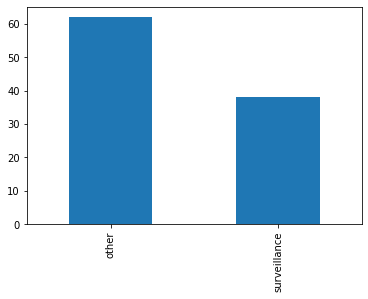

In [20]:
#look at breakdown of classes
data['class'].value_counts().plot.bar();

In [21]:
#create the X and y data from our dataset
X = data[['speed', 'altitude']]
y = data['class']

In [22]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

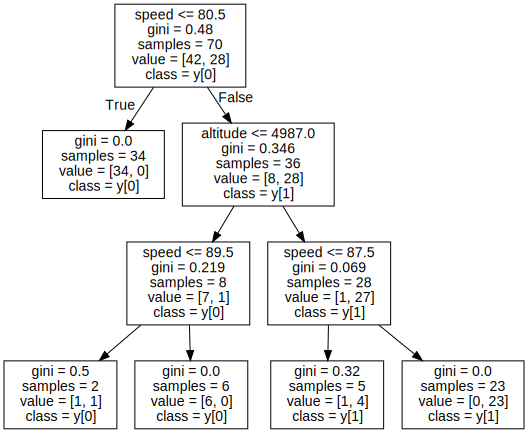

In [27]:
#create and fit decision tree model
decision_tree_model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

# Generate a plot of the decision tree
columns=list(X_train.columns)
graphviz.Source(tree.export_graphviz(decision_tree_model, out_file=None, feature_names=columns,class_names=True))

In [28]:
#make predictions on the test data
predictions = decision_tree_model.predict(X_test)

In [29]:
#create a data frame that compares the real values to the predicted values
test_data = pd.concat([X_test, y_test], axis=1)
test_data['predicted_class'] = predictions
test_data.reset_index(drop=True, inplace=True)
test_data.head()

,speed,altitude,class,predicted_class
0,109,8200,surveillance,surveillance
1,82,5449,surveillance,surveillance
2,94,6600,other,surveillance
3,80,7125,other,other
4,80,6325,other,other


In [30]:
test_data[(test_data['speed'] <= 80.5) & (test_data['altitude'] <= 4987)]

,speed,altitude,class,predicted_class
5,75,4950,other,other
8,60,4375,other,other
9,0,3600,other,other
11,70,4300,other,other
13,71,4400,other,other
15,47,4700,other,other
18,60,4290,other,other
25,62,4550,other,other


In [32]:
test_data[(test_data['speed'] > 80.5) & (test_data['altitude'] > 4987)]

,speed,altitude,class,predicted_class
0,109,8200,surveillance,surveillance
1,82,5449,surveillance,surveillance
2,94,6600,other,surveillance
7,105,8900,surveillance,surveillance
12,94,7400,surveillance,surveillance
16,98,8425,surveillance,surveillance
17,98,9474,surveillance,surveillance
20,83,6325,surveillance,surveillance
24,93,7625,surveillance,surveillance
27,137,8350,surveillance,surveillance


In [33]:
#print accuracy score for the test set
decision_tree_model.score(X_test, y_test)

0.9666666666666667